<a href="https://colab.research.google.com/github/AlikhanBehzad/13_Assingment-Creating-Calculator-in-HTML-CSS-and-JavaScript/blob/main/Diabetes_Trend_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, classification_report
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier


In [37]:
#  Load the dataset that includes an 'Age' column
df = pd.read_csv('/content/diabetes(1).csv')

# Display the first few rows of the dataset
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [38]:
# Handling missing values in the Age column
df['Age'] = df['Age'].fillna(df['Age'].mean())

# Ensure the Age column is numeric
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# Filter out any unrealistic ages (e.g., negative values, extremely high values)
df = df[(df['Age'] >= 0) & (df['Age'] <= 100)]


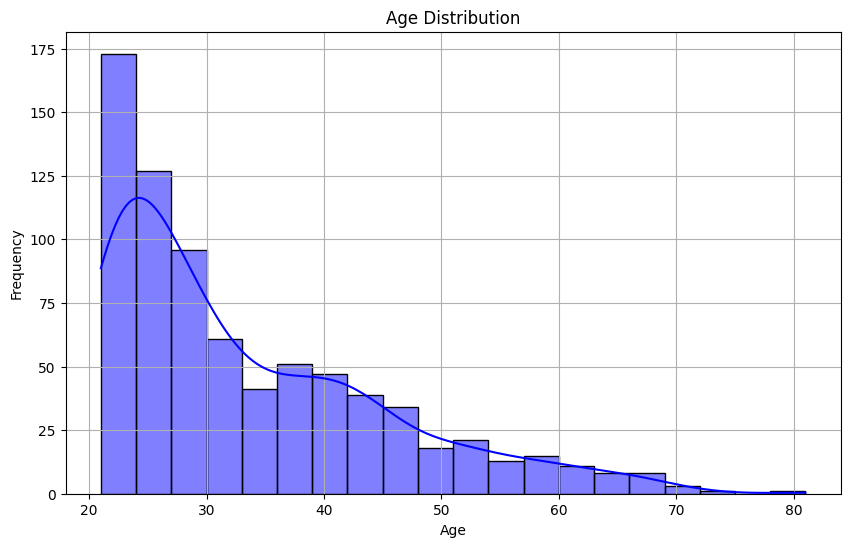

In [39]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [41]:
# Defining age bins (e.g., 0-10, 11-20, ..., 91-100)
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
df['Age_Group'] = pd.cut(df['Age'], bins=age_bins)

# Count the frequency of each age group
age_group_counts = df['Age_Group'].value_counts().sort_index()

# Display the counts
age_group_counts


,count
Age_Group,
"(0, 10]",0
"(10, 20]",0
"(20, 30]",417
"(30, 40]",157
"(40, 50]",113
"(50, 60]",54
"(60, 70]",25
"(70, 80]",1
"(80, 90]",1


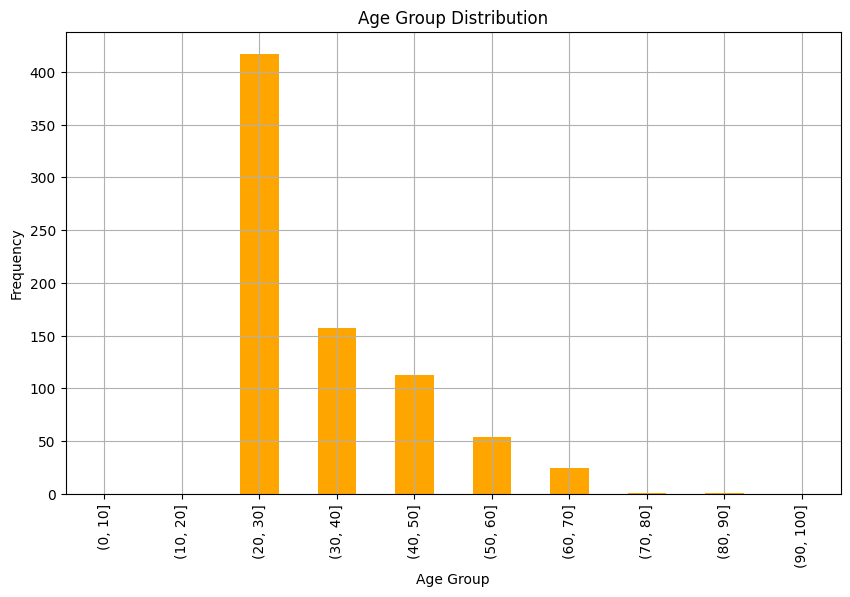

In [42]:
plt.figure(figsize=(10, 6))
age_group_counts.plot(kind='bar', color='orange')
plt.title('Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [43]:
# Define age bins (e.g., every 10 years)
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
df['Age_Group'] = pd.cut(df['Age'], bins=age_bins)

# Calculate the mean or median diabetes-related metrics within each age group
age_grouped = df.groupby('Age_Group').agg({
    'Glucose': 'mean',  # Replace 'Glucose' with the relevant metric in your dataset
    'Insulin': 'mean',  # Example for insulin levels
    'BMI': 'mean',      # Example for Body Mass Index
    'Outcome': 'mean'   # Assuming 'Outcome' is a binary indicator of diabetes
}).reset_index()

# Display the grouped data
age_grouped


<ipython-input-43-1ee0cafc4220>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_grouped = df.groupby('Age_Group').agg({


,Age_Group,Glucose,Insulin,BMI,Outcome
0,"(0, 10]",NaN,NaN,NaN,NaN
1,"(10, 20]",NaN,NaN,NaN,NaN
2,"(20, 30]",114.175060,84.306954,31.322062,0.215827
3,"(30, 40]",126.178344,76.707006,32.886624,0.484076
4,"(40, 50]",124.884956,60.274336,34.501770,0.566372
5,"(50, 60]",141.148148,126.777778,31.114815,0.574074
6,"(60, 70]",137.560000,14.800000,28.856000,0.280000
7,"(70, 80]",119.000000,0.000000,19.600000,0.000000
8,"(80, 90]",134.000000,60.000000,25.900000,0.000000
9,"(90, 100]",NaN,NaN,NaN,NaN


In [22]:
# Calculate basic statistics for the Age column
mean_age = df['Age'].mean()
median_age = df['Age'].median()
mode_age = df['Age'].mode()[0]

print(f"Mean Age: {mean_age}")
print(f"Median Age: {median_age}")
print(f"Mode Age: {mode_age}")



Mean Age: 33.240885416666664
Median Age: 29.0
Mode Age: 22


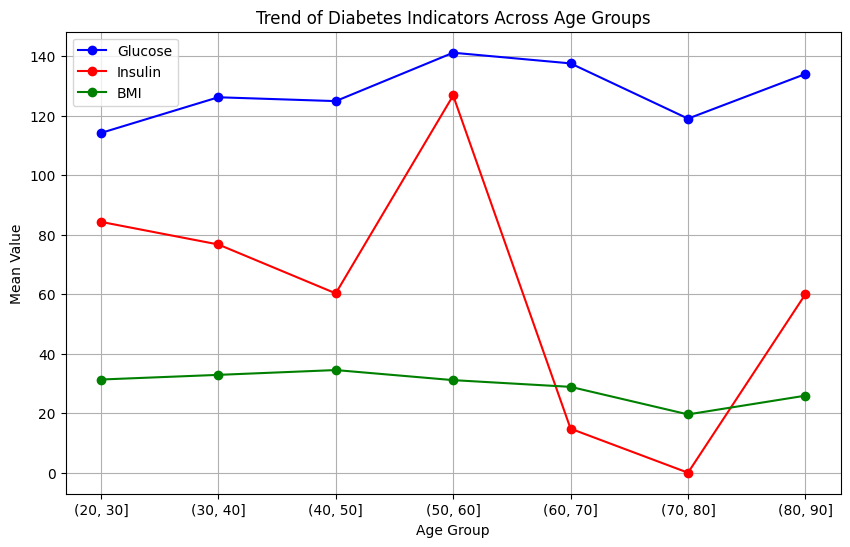

In [44]:
# Visualize the Trends by Age Group

plt.figure(figsize=(10, 6))

# Plotting the mean glucose levels by age group
plt.plot(age_grouped['Age_Group'].astype(str), age_grouped['Glucose'], marker='o', label='Glucose', color='blue')

# Plotting the mean insulin levels by age group
plt.plot(age_grouped['Age_Group'].astype(str), age_grouped['Insulin'], marker='o', label='Insulin', color='red')

# Plotting the mean BMI by age group
plt.plot(age_grouped['Age_Group'].astype(str), age_grouped['BMI'], marker='o', label='BMI', color='green')

# Customize the plot
plt.title('Trend of Diabetes Indicators Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Mean Value')
plt.legend()
plt.grid(True)
plt.show()



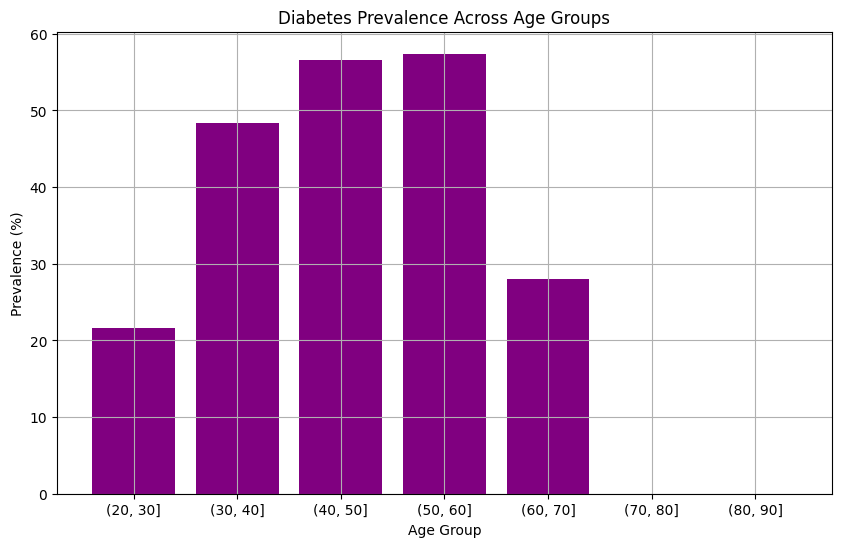

In [45]:
 #Analyze the Trend in Diabetes Prevalence by Age
 plt.figure(figsize=(10, 6))

# Plot the prevalence of diabetes by age group
plt.bar(age_grouped['Age_Group'].astype(str), age_grouped['Outcome'] * 100, color='purple')
plt.title('Diabetes Prevalence Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Prevalence (%)')
plt.grid(True)
plt.show()


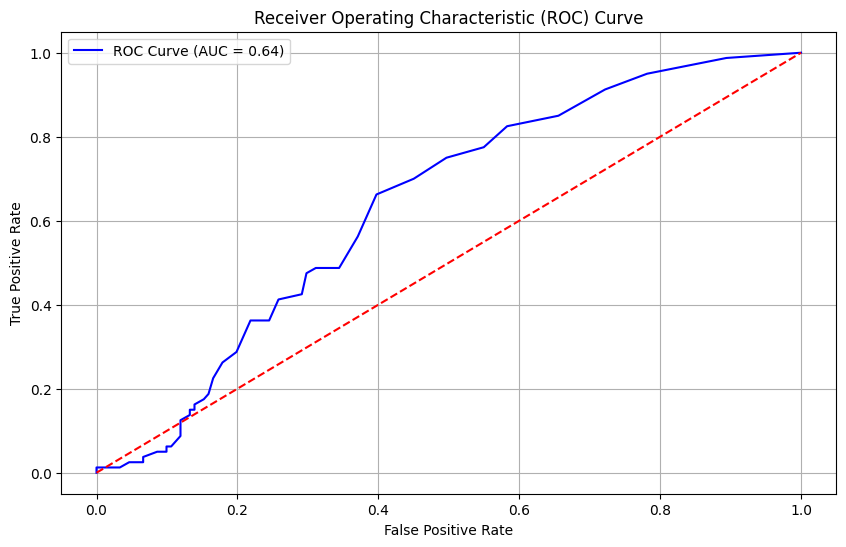

              precision    recall  f1-score   support

           0       0.66      0.86      0.75       151
           1       0.38      0.16      0.23        80

    accuracy                           0.62       231
   macro avg       0.52      0.51      0.49       231
weighted avg       0.56      0.62      0.57       231



In [46]:


# Assuming 'Outcome' is the target variable (1 for diabetes, 0 for no diabetes)
X = df[['Age']]  # You can include more features here if available
y = df['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict probabilities
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Calculate and plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()

# Display classification report
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


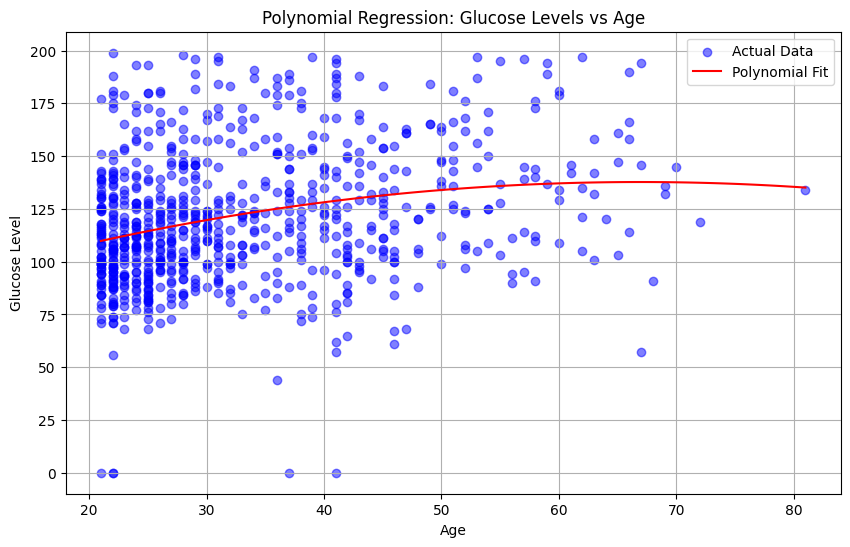

In [47]:


# Polynomial Features
poly = PolynomialFeatures(degree=2)  # You can increase the degree for more complex relationships
X_poly = poly.fit_transform(df[['Age']])

# Fit the polynomial regression model
poly_model = LinearRegression()
poly_model.fit(X_poly, df['Glucose'])

# Predict and plot
age_range = np.linspace(df['Age'].min(), df['Age'].max(), 100).reshape(-1, 1)
age_range_poly = poly.transform(age_range)
glucose_pred = poly_model.predict(age_range_poly)

plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['Glucose'], color='blue', alpha=0.5, label='Actual Data')
plt.plot(age_range, glucose_pred, color='red', label='Polynomial Fit')
plt.title('Polynomial Regression: Glucose Levels vs Age')
plt.xlabel('Age')
plt.ylabel('Glucose Level')
plt.legend()
plt.grid(True)
plt.show()


In [48]:
# Assume df includes additional features like 'Years_with_Diabetes'
df['Cohort'] = pd.cut(df['Age'], bins=[0, 30, 40, 50, 60, 70, 80, 100], labels=['<30', '30-39', '40-49', '50-59', '60-69', '70-79', '80+'])

cohort_analysis = df.groupby('Cohort').agg({
    'Glucose': ['mean', 'std'],
    'Insulin': ['mean', 'std'],
    'BMI': ['mean', 'std'],
    'Outcome': 'mean'
}).reset_index()

# Flatten the multi-index columns
cohort_analysis.columns = [' '.join(col).strip() for col in cohort_analysis.columns.values]

print(cohort_analysis)


  Cohort  Glucose mean  Glucose std  Insulin mean  Insulin std   BMI mean  \
0    <30    114.175060    28.730772     84.306954   109.456203  31.322062   
1  30-39    126.178344    33.375775     76.707006   112.185758  32.886624   
2  40-49    124.884956    34.733874     60.274336   101.182054  34.501770   
3  50-59    141.148148    31.338329    126.777778   181.455298  31.114815   
4  60-69    137.560000    32.561583     14.800000    51.244512  28.856000   
5  70-79    119.000000          NaN      0.000000          NaN  19.600000   
6    80+    134.000000          NaN     60.000000          NaN  25.900000   

    BMI std  Outcome mean  
0  8.691704      0.215827  
1  6.389616      0.484076  
2  5.769795      0.566372  
3  7.853695      0.574074  
4  7.583869      0.280000  
5       NaN      0.000000  
6       NaN      0.000000  


<ipython-input-48-7e5c81cc6d8f>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cohort_analysis = df.groupby('Cohort').agg({


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


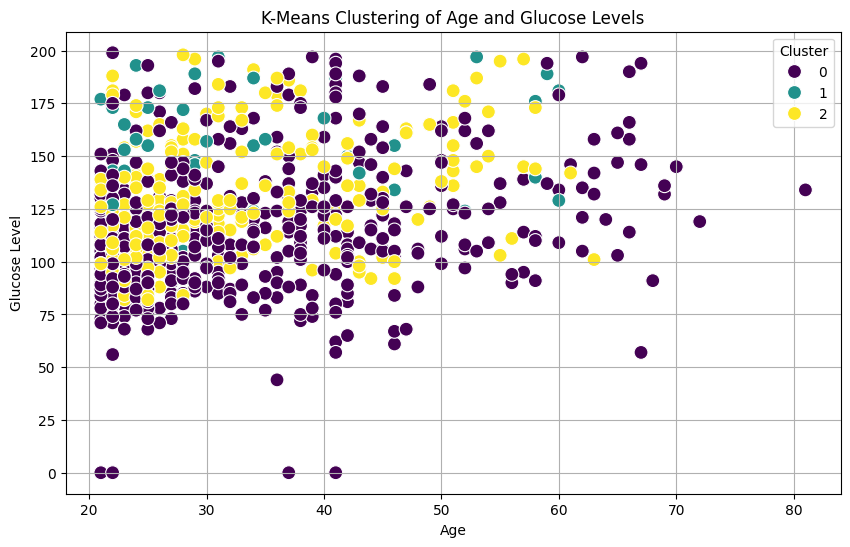

In [49]:
from sklearn.cluster import KMeans

# Selecting features for clustering (including age)
features = df[['Age', 'Glucose', 'Insulin', 'BMI']]

# Fit KMeans clustering
kmeans = KMeans(n_clusters=3)  # You can adjust the number of clusters
df['Cluster'] = kmeans.fit_predict(features)

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Glucose', hue='Cluster', data=df, palette='viridis', s=100)
plt.title('K-Means Clustering of Age and Glucose Levels')
plt.xlabel('Age')
plt.ylabel('Glucose Level')
plt.grid(True)
plt.show()
